In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


Training Random Forest...

Random Forest Model Performance:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1066
           1       0.99      0.99      0.99       934

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



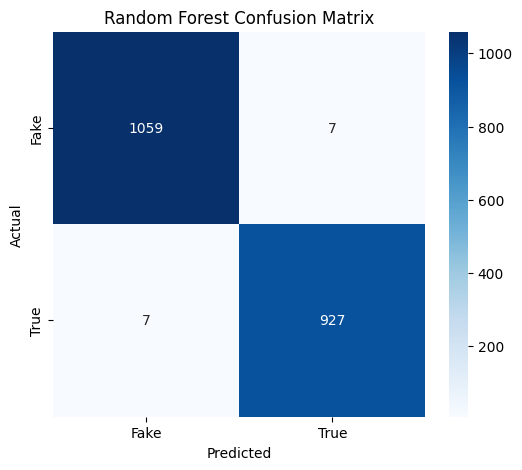


Training SVM...

SVM Model Performance:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1066
           1       0.98      0.98      0.98       934

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



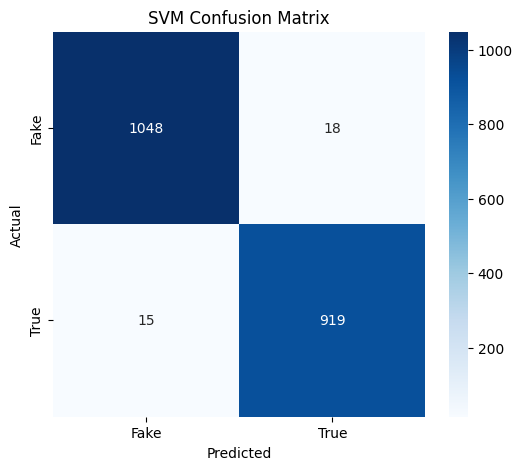


Training Logistic Regression...

Logistic Regression Model Performance:

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1066
           1       0.97      0.98      0.97       934

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



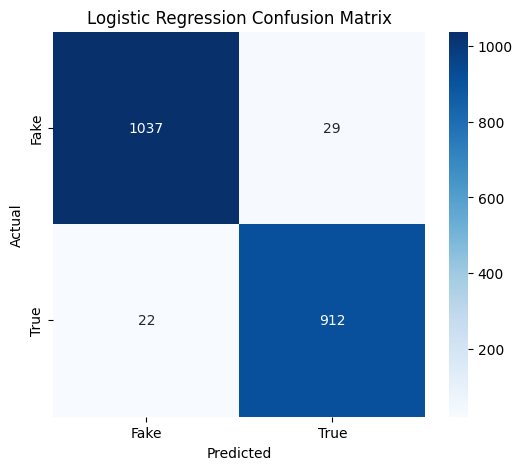

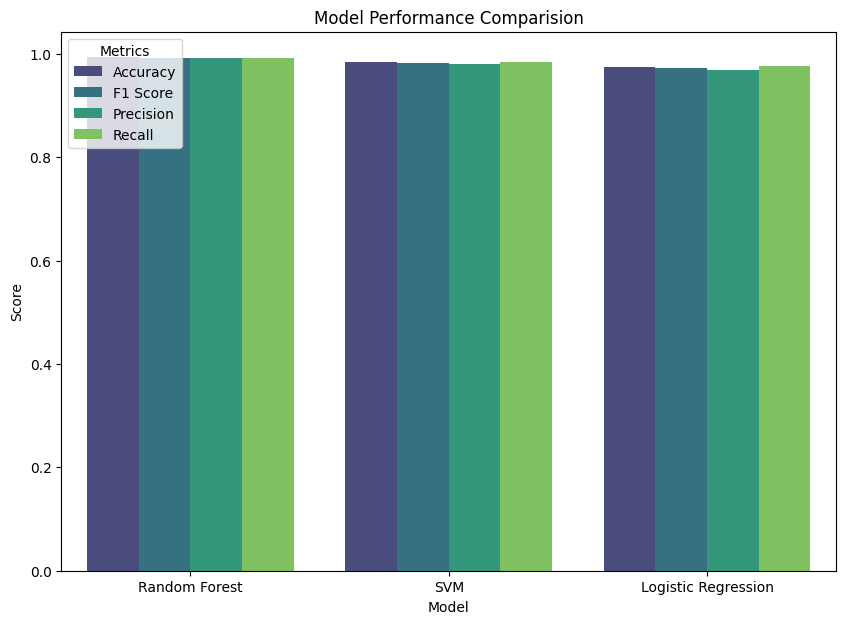


Performance Metrics Table:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest    0.9930   0.992505  0.992505  0.992505
1                  SVM    0.9835   0.980790  0.983940  0.982362
2  Logistic Regression    0.9745   0.969182  0.976445  0.972800


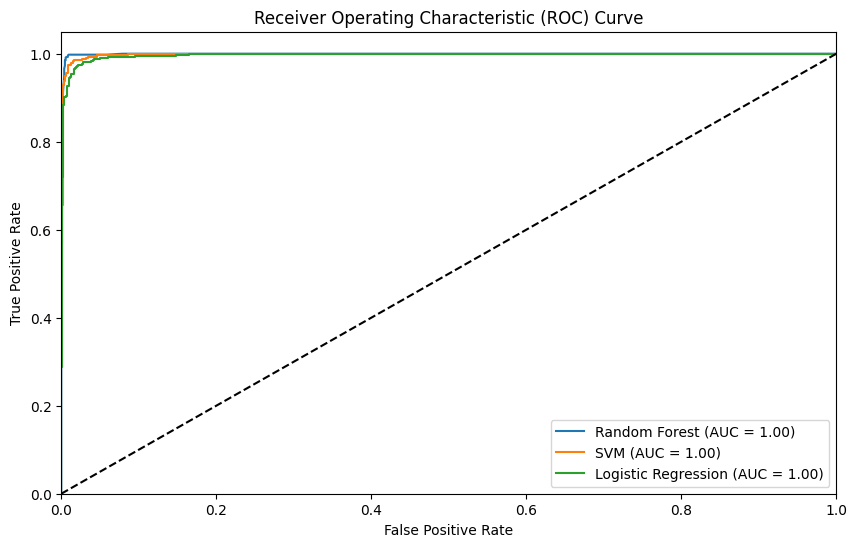

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# Load the datasets
fake_df = pd.read_csv('fake.csv')
true_df = pd.read_csv('true.csv')

# Add labels: 0 for fake, 1 for true
fake_df['label'] = 0
true_df['label'] = 1

# Combine the datasets
data = pd.concat([fake_df, true_df], ignore_index=True)
data = data[['text', 'label']]

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Sample data for quick execution (optional for Kaggle notebooks)
# Uncomment the next line if the dataset is too large
data = data.sample(n=10000, random_state=42)

# Split into training and testing sets
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
rf = RandomForestClassifier(n_estimators=50, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
lr = LogisticRegression(max_iter=500, random_state=42)

# Train and evaluate models
models = {'Random Forest': rf, 'SVM': svm, 'Logistic Regression': lr}
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    # Evaluate the model
    print(f"\n{name} Model Performance:\n")
    print(classification_report(y_test, preds))

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Append results for metrics
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1 Score': f1_score(y_test, preds)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Reshape the DataFrame for plotting
results_melted = pd.melt(results_df, id_vars=['Model'], value_vars=['Accuracy', 'F1 Score', 'Precision', 'Recall'], var_name='Metric', value_name='Score')

# Plot results for all metrics
plt.figure(figsize=(10, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('Model Performance Comparision')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', loc='upper left')
plt.show()

# Display results in a table
print("\nPerformance Metrics Table:")
print(results_df)

# Plot for combine ROC curve
plt.figure(figsize=(10,6))
for name, model in models.items():
  probs = model.predict_proba(X_test_tfidf)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('roc_curve.png')
plt.show()